# Model 1

## Part (a)

In [3]:
Cars = read.csv("Honda Pilot Data.csv")
fix(Cars)
attach(Cars)

In [4]:
model = lm(price~age+miles)
summary(model)
anova(model)


Call:
lm(formula = price ~ age + miles)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1380 -2.3528 -0.2243  2.6384  5.5287 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.12758    1.64663  26.799  < 2e-16 ***
age         -1.13046    0.46922  -2.409  0.02480 *  
miles       -0.15291    0.04178  -3.660  0.00138 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.257 on 22 degrees of freedom
Multiple R-squared:  0.8642,	Adjusted R-squared:  0.8519 
F-statistic:    70 on 2 and 22 DF,  p-value: 2.898e-10


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1342.7062,1342.70622,126.60504,1.354480e-10
miles,1,142.0430,142.04300,13.39337,1.378001e-03
Residuals,22,233.3204,10.60547,NA,NA


## Part(b)

In [11]:

y = Cars[1,3]
y_hat = 44.12758 -1.13046*Cars[1,1] -0.15291*Cars[1,2]

print(y - y_hat)


[1] 3.168442


## Part (c)

In [36]:
coef(summary(model))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),44.1275827,1.64662902,26.798740,2.727608e-18
age,-1.1304593,0.46922122,-2.409225,2.479889e-02
miles,-0.1529085,0.04178175,-3.659695,1.378001e-03


The null hypothesis for each of these tests is simply that the slope of the linear regression equals 0 (no linear relationship).

Since the p-values for each predictor is less than 0.05 we reject the null hypothesis and conclude that there is no convincing evidence to reject the claim that there is no linear relationship between each predictor (age and miles) and price.


## Part (d)

In [17]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1342.7062,1342.70622,126.60504,1.354480e-10
miles,1,142.0430,142.04300,13.39337,1.378001e-03
Residuals,22,233.3204,10.60547,NA,NA


The null hypothesis is that there is no relationship between the independent variables and the dependent variable.

Again the p-values here are less than 0.05, so we reject the null and conclude that there is a linear relationship between age and miles, and price.

# Model 2

## Part (a)

In [42]:
model2 = lm(price~age + I(age^2))
summary(model2)


Call:
lm(formula = price ~ age + I(age^2))

Residuals:
   Min     1Q Median     3Q    Max 
-6.170 -2.261  1.041  2.036  6.630 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.21804    3.53090  15.072 4.46e-13 ***
age         -6.01747    1.04906  -5.736 9.05e-06 ***
I(age^2)     0.23259    0.06992   3.327  0.00306 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.369 on 22 degrees of freedom
Multiple R-squared:  0.8546,	Adjusted R-squared:  0.8414 
F-statistic: 64.67 on 2 and 22 DF,  p-value: 6.124e-10


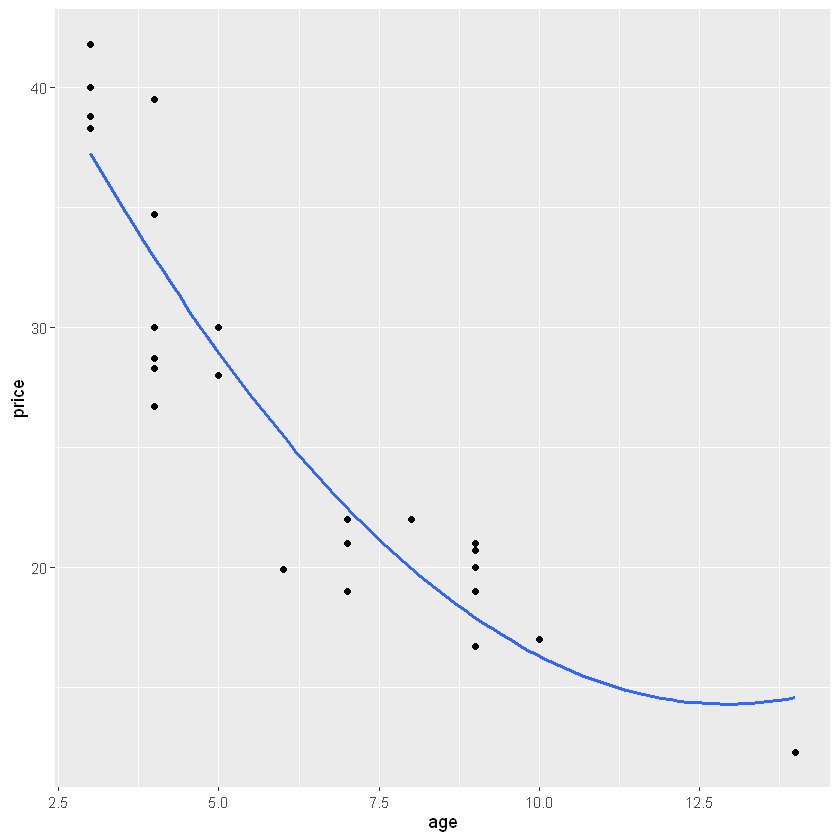

In [29]:
library(ggplot2)

ggplot(data=Cars, aes(x=age, y=price)) + geom_point() + geom_smooth(method="lm", formula=y~poly(x, 2), se=FALSE)

## Part (b)

If we graph the quadratic and see where it intersects the y-axis (i.e. price = 0), we see there is no age for which the car is free (minimum price is around 14 thousand dollars).

## Part (c)

A parabola described by a quadratic model would predict that extremely old cars would be more valuable than brand new cars! This is because at a certain point, the parabola curves back upwards which is a trend we would not see in real life. Perhaps, one could argue that antique cars are worth a lot, but a 20 year old car, which is not considered antique, should definitely not be more expensive than a 5 year old car (as predicted by the model).

## Part (d)


Call:
lm(formula = price ~ poly(age, 3))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2685 -2.0788  0.2071  1.5841  7.5315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    26.2960     0.5875  44.761  < 2e-16 ***
poly(age, 3)1 -36.6430     2.9374 -12.475 3.55e-11 ***
poly(age, 3)2  11.2079     2.9374   3.816  0.00101 ** 
poly(age, 3)3  -8.2798     2.9374  -2.819  0.01029 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.937 on 21 degrees of freedom
Multiple R-squared:  0.8945,	Adjusted R-squared:  0.8795 
F-statistic: 59.38 on 3 and 21 DF,  p-value: 1.989e-10


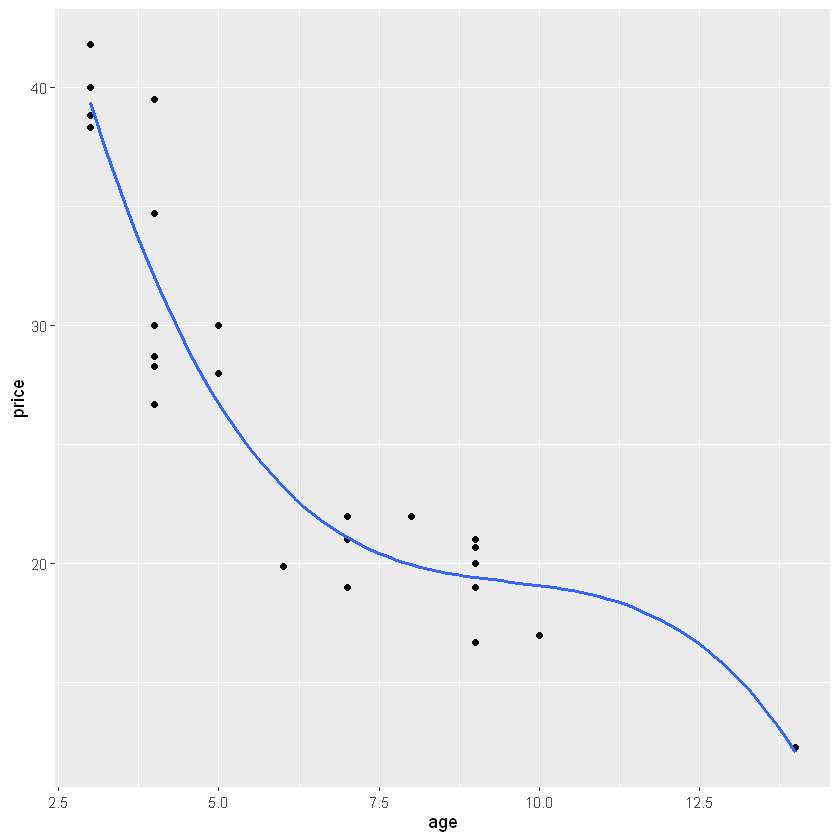

In [37]:
model3 = lm(price~poly(age,3))
summary(model3)

ggplot(data=Cars, aes(x=age, y=price)) + geom_point() + geom_smooth(method="lm", formula=y~poly(x,3), se=FALSE)

If we look at the $R^2$ statistic we can see that cubic term just barely improves the percentage of variance in price that can be explained by age. The p value is less than 0.05, but not quite as low as the other quadratic and linear predictors. If we look at the graph however, we can see that again we get the free car phenomenon, but it does fit the given data slightly better.

# Model 3

## Part (a)

$\text{Price} = \beta_0 + \beta_1\text{Age} + \beta_2\text{Age}^2 + \beta_3\text{Age}\cdot\text{Miles} + \beta_4\text{Miles}+ \beta_5\text{Miles}^2 + \epsilon$ 

## Part (b)

In [34]:
model4 = lm(price~age + miles + I(miles^2) + I (age^2) + I(age*miles))
summary(model4)
anova(model4)


Call:
lm(formula = price ~ age + miles + I(miles^2) + I(age^2) + I(age * 
    miles))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3190 -1.4026  0.4572  1.7258  3.6190 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    54.7720132  4.0551863  13.507 3.43e-11 ***
age            -3.8517798  1.4826132  -2.598   0.0177 *  
miles          -0.2463198  0.1075335  -2.291   0.0336 *  
I(miles^2)     -0.0004466  0.0019650  -0.227   0.8227    
I(age^2)       -0.0577344  0.2042275  -0.283   0.7805    
I(age * miles)  0.0356460  0.0414986   0.859   0.4011    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.899 on 19 degrees of freedom
Multiple R-squared:  0.9071,	Adjusted R-squared:  0.8826 
F-statistic: 37.09 on 5 and 19 DF,  p-value: 3.662e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,1342.706221,1342.706221,159.7767050,1.071586e-10
miles,1,142.042996,142.042996,16.9025521,5.942545e-04
I(miles^2),1,51.067842,51.067842,6.0768703,2.339479e-02
I(age^2),1,16.382909,16.382909,1.9495011,1.787412e-01
I(age * miles),1,6.200434,6.200434,0.7378271,4.010653e-01
Residuals,19,159.669197,8.403642,NA,NA


Equation:

$\text{Price} = 54.7720132 -3.8517798\text{Age} -0.0577344\text{Age}^2 + 0.0356460\text{Age}\cdot\text{Miles}-3.8517798\text{Miles}-0.0004466\text{Miles}^2 + \epsilon$ 

## Part (c)

In [40]:
mdl1 = lm(price~I(age*miles)+I(miles^2))
summary(mdl1)

a = anova(mdl1, model4)
a
F = ((a[1,2] - a[2,2]) / (a[1,1] - a[2,1]))/(a[2,2]/a[2,1])


Call:
lm(formula = price ~ I(age * miles) + I(miles^2))

Residuals:
   Min     1Q Median     3Q    Max 
-5.468 -2.932 -1.339  4.132  7.401 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    35.9014064  1.4049132  25.554   <2e-16 ***
I(age * miles) -0.0086463  0.0067047  -1.290    0.211    
I(miles^2)     -0.0008733  0.0006257  -1.396    0.177    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.207 on 22 degrees of freedom
Multiple R-squared:  0.7733,	Adjusted R-squared:  0.7527 
F-statistic: 37.53 on 2 and 22 DF,  p-value: 8.11e-08


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,389.4087,NA,NA,NA,NA
2,19,159.6692,3,229.7395,9.112695,0.0006008898


[1] 9.112695

The null hypothesis is that the reduced model (just quadratic terms with miles) provides an equally good fit to the data as the complete model (with age).
We can caluclate the F-value using the Residual Sum of Squares and degrees of freedom, and see that the p-value is less than 0.05. Therefore we reject the null and find that the additional age predictors are statistically significant in predicting price.

# Wrap Up

Overall, it seems that the quadratic model with just age seems to perform the best under most scenarios. The coefficients for that model are all statistically significant, it avoids the free car phenomenon, and it is a relatively simple model which means it doesn't tend to overfit to the data. While it only takes age into account, it does seem that the miles predictors (including linear, quadratic, and interaction) don't seem to predict price as well as age. Additionally the $R^2$ term for that model was extremely high with almost 85% of variance explained by age!